# 線性回歸預測房價數據

## 分析目標

此資料分析報告的目的，是基於已有的房屋銷售價格，以及與該房屋相關的屬性，進行線性回歸分析，從而利用建立出的線性回歸模型，對以下未知售價的房屋，根據其屬性進行價格預測：

面積為6500平方英尺，有4個臥室、2個廁所，總共2層，不位於主幹道、無客房、帶地下室、有熱水器、無空調、車位數為2，位於城市首選社區，簡裝修。

## 簡介

`house_price.csv`記錄了超過五百棟房屋的交易價格，以及房屋的相關屬性資訊，包括房屋面積、臥室數、廁所數、樓層數、是否位於主幹道、是否有客房，等等。

`house_price.csv`每列的含义如下：

＊price：房屋出售價格

＊area：房屋面積（單位：平方英尺）

＊bedrooms：臥室數

＊bathrooms：廁所數

＊stories：樓層數

＊mainroad：是否位於主幹道

＊guestroom：是否有客房

＊basement：是否有地下室

＊hotwaterheating：是否有熱水器

＊airconditioning：是否有空調

＊parking：車庫容量（以可停車輛數計）

＊prefarea：是否位於城市首選社區

＊furnishingstatus：裝修狀態

＊furnished：精裝

＊semi-furnished：簡裝

＊unfurnished：毛坯

In [7]:
import pandas as pd

In [8]:
original_data=pd.read_csv("house_price.csv")
original_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 評估數據結構

##### 每個欄位為變量，每一列爲一個觀察值，數據結構整齊

### 評估數據乾淨度

In [12]:
cleaned_data=original_data.copy()

In [13]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


##### 共有545個觀察值，每個變量皆無缺失值

##### mainroad（是否位於主幹道）、guestroom（是否有客房）、basement（是否有地下室）、hotwaterheating（是否有熱水器）、airconditioning（是否有空調）、prefarea（是否位於城市首選社區）、furnishingstatus（裝潢狀態）都是分類資料，將這些欄位的資料型態統一轉換為 category 類型。

In [16]:
cleaned_data["mainroad"]=cleaned_data["mainroad"].astype("category")
cleaned_data["guestroom"]=cleaned_data["guestroom"].astype("category")
cleaned_data["basement"]=cleaned_data["basement"].astype("category")
cleaned_data["hotwaterheating"]=cleaned_data["hotwaterheating"].astype("category")
cleaned_data["airconditioning"]=cleaned_data["airconditioning"].astype("category")
cleaned_data["prefarea"]=cleaned_data["prefarea"].astype("category")
cleaned_data["furnishingstatus"]=cleaned_data["furnishingstatus"].astype("category")

### 評估數據重複值

In [18]:
cleaned_data.duplicated().sum()

0

##### 每項觀察值皆無重複

### 評估不一致數據

##### 不一致的資料可能存在於所有分類變數中，我們需要檢查是否有不同的值實際上是指代同一個目標的情況。

In [22]:
cleaned_data["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [23]:
cleaned_data["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [24]:
cleaned_data["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [25]:
cleaned_data["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [26]:
cleaned_data["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [27]:
cleaned_data["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [28]:
cleaned_data["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

##### 以上分類變量皆不存在不一致數據

### 評估數據無效值及錯誤值

In [31]:
cleaned_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


##### 從以上資訊來看，不存在與現實意義不符的數值。

### 探索數據

##### 藉助資料視覺化，探索數值變數的分佈，以及與房價存在相關性的變數，為後續的進一步分析提供方向。

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sns.set_palette("pastel")

#### 房價分布

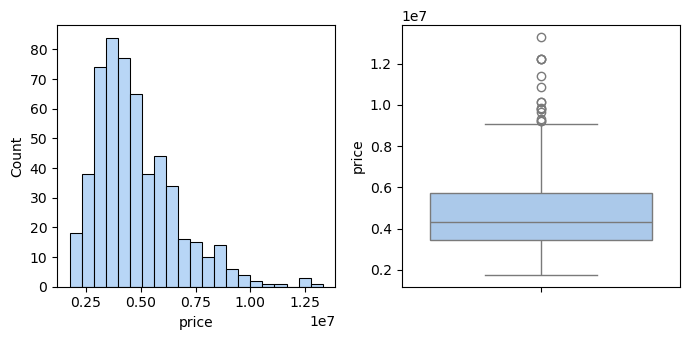

In [38]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data,x='price',ax=axes[0])
sns.boxplot(cleaned_data,y='price',ax=axes[1])
plt.show()

##### 房價呈現右態分佈，大部分房屋價格中等，但有少部分售價較高的極端值，拉高平均房屋售價

#### 面積分布

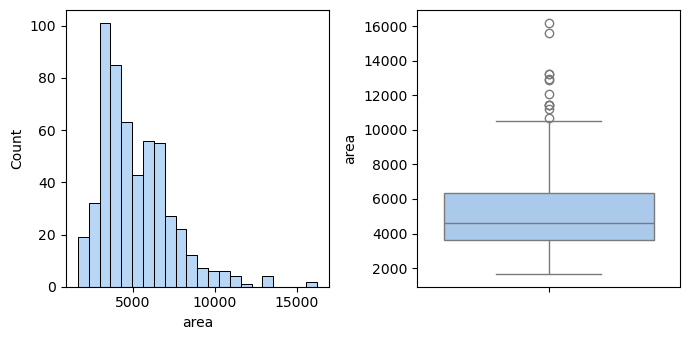

In [41]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='area',ax=axes[0])
sns.boxplot(cleaned_data, y='area', ax=axes[1])
plt.show()

##### 面積呈現右態分佈，有少部分面積較大的極端值，提高平均房屋面積

#### 房價和面積的關係

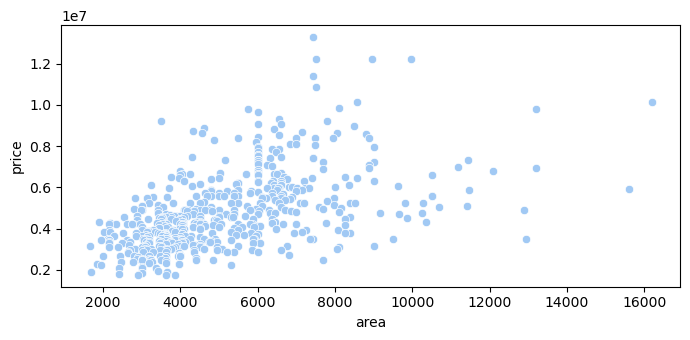

In [44]:
sns.scatterplot(cleaned_data,x='area',y='price')
plt.show()

##### 從散佈圖可看出房價與面積有些許正相關

#### 房間數與房價的關係

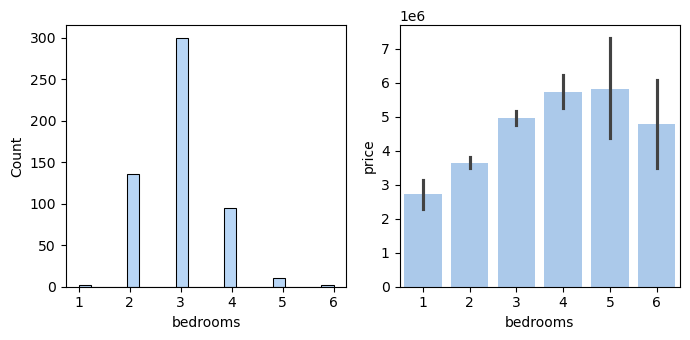

In [47]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='bedrooms',ax=axes[0])
sns.barplot(cleaned_data,x='bedrooms',y='price',ax=axes[1])
plt.show()

##### 房屋的房間數範圍為1~6間，從平均房價與房間數的長條圖來看，當房間數少於5間時，房間數越多的房價也較高，但若是超過 5 間臥室，房價未必隨之增加。

#### 浴室數量與房價的關係

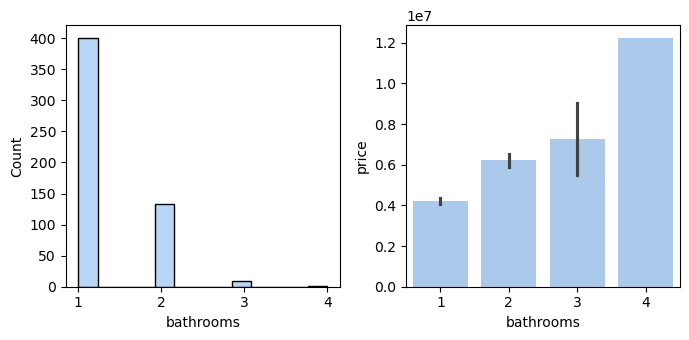

In [50]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='bathrooms',ax=axes[0])
sns.barplot(cleaned_data,x='bathrooms',y='price',ax=axes[1])
plt.show()

##### 房子的浴室數量為1~4間，其中擁有1間浴室的房子數量最多，浴室數量越多的房子，其價格也相應較高。

#### 樓層數與房價的關係

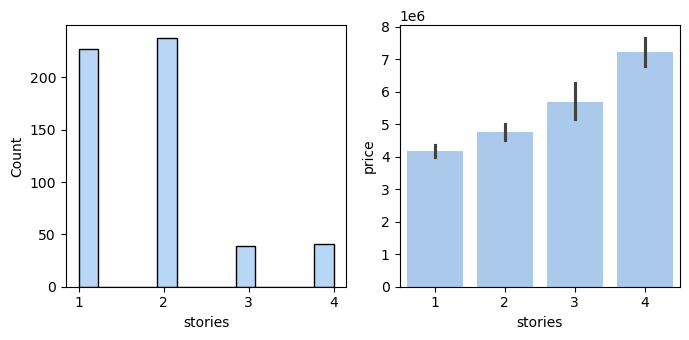

In [53]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='stories',ax=axes[0])
sns.barplot(cleaned_data,x='stories',y='price',ax=axes[1])
plt.show()

##### 大部分房屋樓層為1~2層，越高樓層房價也越高。

#### 車庫數量與房價關係

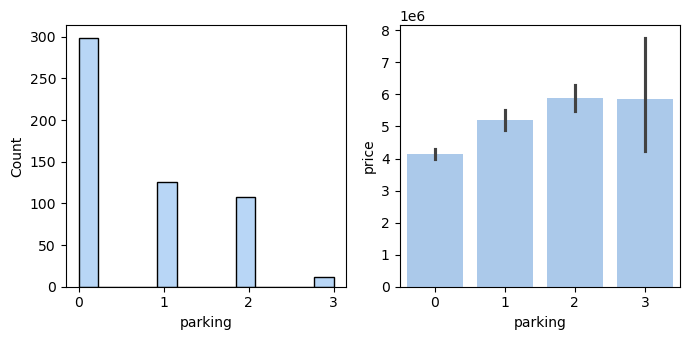

In [56]:
figure,axes=plt.subplots(1,2)
sns.histplot(cleaned_data,x='parking',ax=axes[0])
sns.barplot(cleaned_data,x='parking',y='price',ax=axes[1])
plt.show()

##### 車庫數範圍為1~3個，其中沒有車庫的房子數量最多，車庫數較多的房子價格也相應較高，但當車庫數超過2個後，房價不一定隨之增加。

#### 是否在主要道路與房價的關係

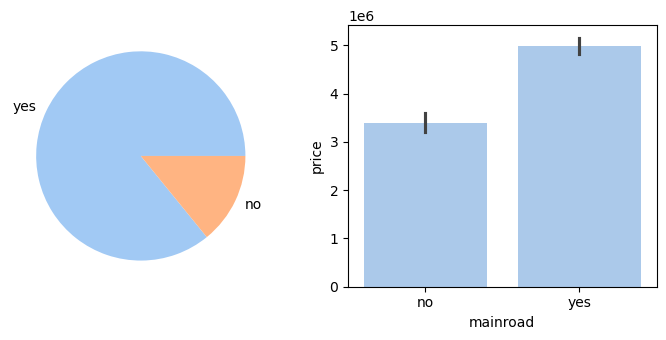

In [59]:
figure,axes=plt.subplots(1,2)
mainroad_count=cleaned_data["mainroad"].value_counts()
mainroad_labels=mainroad_count.index
axes[0].pie(mainroad_count,labels=mainroad_labels)
sns.barplot(cleaned_data,x="mainroad",y='price',ax=axes[1])
plt.show()

##### 大部分房屋位於主要道路，且位於主要道路的房價也相對較高。

#### 是否有客房與房價的關係

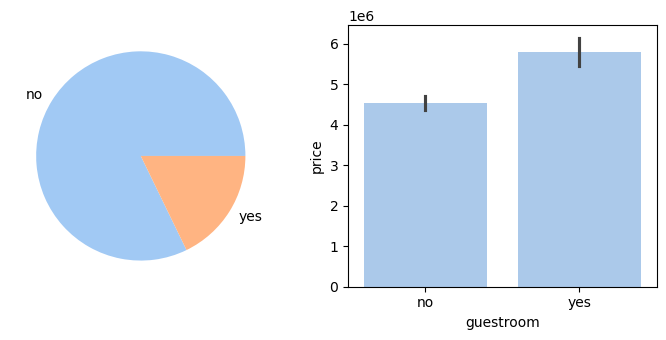

In [62]:
figure,axes=plt.subplots(1,2)
guestroom_count=cleaned_data["guestroom"].value_counts()
guestroom_labels=guestroom_count.index
axes[0].pie(guestroom_count,labels=guestroom_labels)
sns.barplot(cleaned_data,x="guestroom",y="price",ax=axes[1])
plt.show()

##### 大部分房屋沒有客房，且無客房的房價相對較低。

#### 是否有地下室與房價的關係

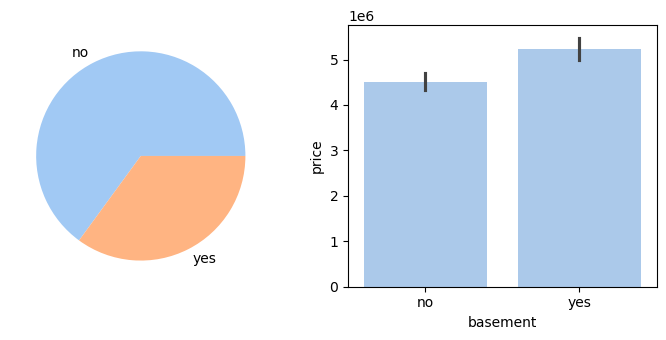

In [65]:
figure,axes=plt.subplots(1,2)
basement_count=cleaned_data["basement"].value_counts()
basement_labels=basement_count.index
axes[0].pie(basement_count,labels=basement_labels)
sns.barplot(cleaned_data,x="basement",y="price",ax=axes[1])
plt.show()

##### 大部分房屋無地下室，有地下室的房價相對較高。

#### 是否有熱水器與房價的關係

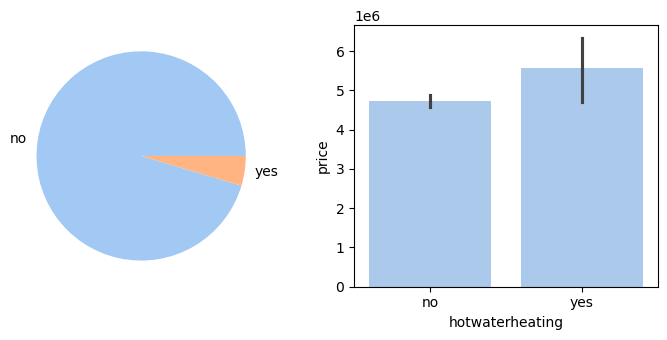

In [68]:
figure,axes=plt.subplots(1,2)
hotwaterheating_count=cleaned_data["hotwaterheating"].value_counts()
hotwaterheating_labels=hotwaterheating_count.index
axes[0].pie(hotwaterheating_count,labels=hotwaterheating_labels)
sns.barplot(cleaned_data,x="hotwaterheating",y='price',ax=axes[1])
plt.show()

##### 絕大部分的房屋沒有熱水器，有熱水器的房價相對較高。

#### 是否有空調與房價的關係

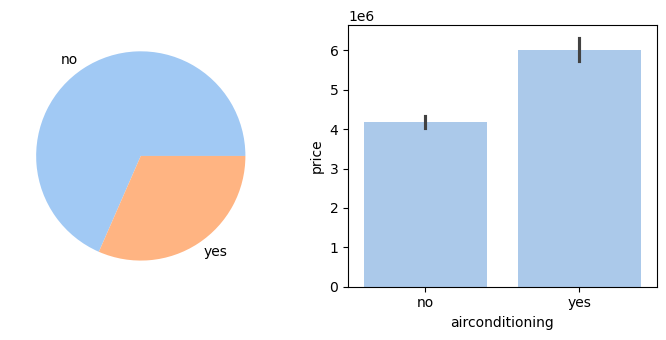

In [71]:
figure,axes=plt.subplots(1,2)
airconditioning_count=cleaned_data["airconditioning"].value_counts()
airconditioning_labels=airconditioning_count.index
axes[0].pie(airconditioning_count,labels=airconditioning_labels)
sns.barplot(cleaned_data,x="airconditioning",y="price",ax=axes[1])
plt.show()

##### 大部分房屋沒有空調，有空調的房屋售價相對較高。

#### 是否位於首選區域與房價的關係

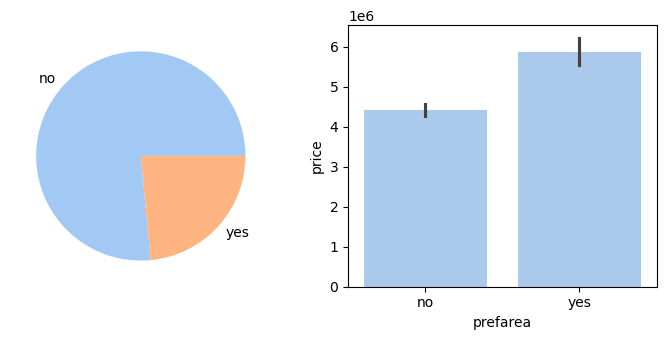

In [74]:
figure,axes=plt.subplots(1,2)
prefarea_count=cleaned_data["prefarea"].value_counts()
prefarea_labels=prefarea_count.index
axes[0].pie(prefarea_count,labels=prefarea_labels)
sns.barplot(cleaned_data,x="prefarea",y="price",ax=axes[1])
plt.show()

##### 少部份房屋位於首選區域，位於首選區域的房屋售價較高。

#### 裝修狀態與房價的關係

/var/folders/j8/lxwq_7013_n3bsgvk53h_1zw0000gn/T/ipykernel_96977/2652089069.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')


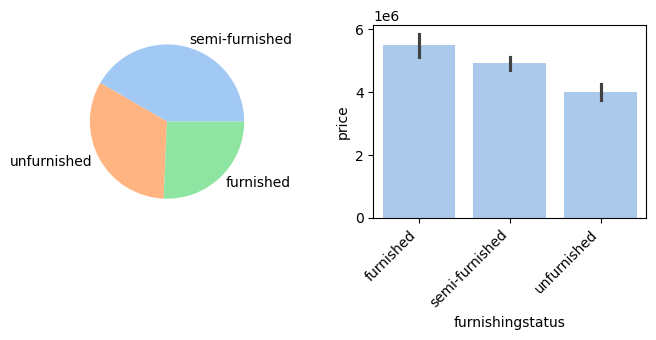

In [77]:
figure,axes=plt.subplots(1,2)
furnishingstatus_counts=cleaned_data["furnishingstatus"].value_counts()
furnishingstatus_labels=furnishingstatus_counts.index
axes[0].pie(furnishingstatus_counts,labels=furnishingstatus_labels)
sns.barplot(cleaned_data,x="furnishingstatus",y="price",ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

##### 簡裝和毛坯的房子較多，約有四分之一的房子為精裝，精裝房的價格高於簡裝，簡裝則高於毛坯。

### 分析數據

In [80]:
import statsmodels.api as sm

In [81]:
lr_house_price=cleaned_data.copy()

##### 由於資料中存在分類變數，無法直接建立線性迴歸模型。我們需要引入虛擬變數，也就是用 0 和 1 分別表示是否屬於該分類。

In [83]:
lr_house_price=pd.get_dummies(lr_house_price,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning",
                                                      "prefarea","furnishingstatus"],dtype=int,drop_first=True)
lr_house_price

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


##### 將應變量和自變量區分，應變量為price變量。

In [85]:
y=lr_house_price["price"]

##### 將除了價格之外的變數納入自變量，但需檢查變數間的相關性。如果變數之間的相關性過高，可能會導致共線性問題。

In [87]:
x=lr_house_price.drop('price',axis=1)

In [88]:
x.corr().abs()>0.8

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,True,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False
stories,False,False,False,True,False,False,False,False,False,False,False,False,False
parking,False,False,False,False,True,False,False,False,False,False,False,False,False
mainroad_yes,False,False,False,False,False,True,False,False,False,False,False,False,False
guestroom_yes,False,False,False,False,False,False,True,False,False,False,False,False,False
basement_yes,False,False,False,False,False,False,False,True,False,False,False,False,False
hotwaterheating_yes,False,False,False,False,False,False,False,False,True,False,False,False,False
airconditioning_yes,False,False,False,False,False,False,False,False,False,True,False,False,False


##### 一般認為，相關係數的絕對值大於0.8時，會導致共線性，因此只需找出絕對值大於 0.8 的相關係數即可。
##### 從以上輸出來看，不同變數之間的相關係數絕對值皆小於或等於 0.8。

##### 為模型添加截距

In [91]:
x=sm.add_constant(x)
x

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


##### 建立線性回歸模型

In [93]:
model=sm.OLS(y,x).fit()

In [94]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sat, 21 Jun 2025   Prob (F-statistic):          9.07e-123
Time:                        12:12:43   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 將顯著區間設為0.05時，從P值可以看出，模型認為以下因素對房屋價格沒有顯著影響：房間數、是否為簡裝房。此外，常數項（代表線性方程的截距）的P值也很大，顯示其亦無顯著影響。因此，可將這些變數移除後，再次建立線性迴歸模型。

In [96]:
x=x.drop(["const","bedrooms","furnishingstatus_semi-furnished"],axis=1)

In [97]:
model=sm.OLS(y,x).fit()

In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Sat, 21 Jun 2025   Prob (F-statistic):                        0.00
Time:                        12:12:43   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### 可以看到，將P值較大的自變量從線性迴歸模型中移除後，R方的值從0.682提高到1，提升了模型對現有資料的擬合度。

##### 根據各個自變量在線性迴歸方程中的係數來看，模型預測以下因素的增加（或存在）會顯著提升房屋價格：房屋面積、廁所數、樓層數、車庫容量、位於主路、有客房、有地下室、有熱水器、有空調、位於城市首選社區。

##### 線性迴歸模型預測以下因素的增加會顯著降低房屋價格：房屋未經裝修，為毛坯房。

#### 預測房價

##### 房屋資訊：面積為6500平方英尺，有4個臥室、2個洗手間，總共2層，不位於主路，無客房，帶地下室，有熱水器，沒有空調，車位數為2，位於城市首選社區，簡裝修。

In [102]:
price_to_predict=pd.DataFrame({'area':6500,'bedrooms':4,"bathrooms":2,"staries":2,"mainroad":["no"],"guestroom":["no"],
                               "basement":["yes"],"hotwaterheating":["yes"],"airconditioning":["no"],"parking":2,"prefarea":["yes"],"furnishingstatus":["semi-furnished"]})
price_to_predict

,area,bedrooms,bathrooms,staries,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


##### 將分類變數的類型轉換為Category，並透過categories參數，讓程式知道所有可能的分類值避免預測資料中所包含的分類可能不完整。
##### 為了確保在引入虛擬變數時不會遺漏某些分類，須事先定義所有可能出現的分類。

In [104]:
price_to_predict["mainroad"]=pd.Categorical(price_to_predict["mainroad"],categories=["no","yes"])
price_to_predict["basement"]=pd.Categorical(price_to_predict["basement"],categories=["no","yes"])
price_to_predict["hotwaterheating"]=pd.Categorical(price_to_predict["hotwaterheating"],categories=["no","yes"])
price_to_predict["guestroom"]=pd.Categorical(price_to_predict["guestroom"],categories=["no","yes"])
price_to_predict["airconditioning"]=pd.Categorical(price_to_predict["airconditioning"],categories=["no","yes"])
price_to_predict["prefarea"]=pd.Categorical(price_to_predict["prefarea"],categories=["no","yes"])
price_to_predict["furnishingstatus"]=pd.Categorical(price_to_predict["furnishingstatus"],categories=["furnished","semi-furnished","unfurnished"])

In [105]:
price_to_predict

,area,bedrooms,bathrooms,staries,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6500,4,2,2,no,no,yes,yes,no,2,yes,semi-furnished


In [106]:
price_to_predict=pd.get_dummies(price_to_predict,columns=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],
                                dtype=int,drop_first=True)
price_to_predict

,area,bedrooms,bathrooms,staries,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,6500,4,2,2,2,0,0,1,1,0,1,1,0


In [107]:
price_to_predict=price_to_predict.drop(["bedrooms","furnishingstatus_semi-furnished"],axis=1)

##### 接下來就可以呼叫線性迴歸模型的predict方法，預測房價。

In [109]:
predicted_value=model.predict(price_to_predict)

In [159]:
predicted_value

0    7.303754e+06
dtype: float64

##### 線性回歸模型預測的價格為：7,303,754